Exception ignored in: <function Viewer.__del__ at 0x000002143672D828>
Traceback (most recent call last):
  File "C:\Users\user\.conda\envs\tf\lib\site-packages\gym\envs\classic_control\rendering.py", line 162, in __del__
    self.close()
  File "C:\Users\user\.conda\envs\tf\lib\site-packages\gym\envs\classic_control\rendering.py", line 81, in close
    self.window.close()
  File "C:\Users\user\.conda\envs\tf\lib\site-packages\pyglet\window\win32\__init__.py", line 299, in close
    super(Win32Window, self).close()
  File "C:\Users\user\.conda\envs\tf\lib\site-packages\pyglet\window\__init__.py", line 823, in close
    app.windows.remove(self)
  File "C:\Users\user\.conda\envs\tf\lib\_weakrefset.py", line 109, in remove
    self.data.remove(ref(item))
KeyError: (<weakref at 0x0000021433FA24A8; to 'Win32Window' at 0x0000021435527DC8>,)


完成第 0 次遊戲
Episode:     0, average reward: -200.0, current epsilon: 1.00
Episode:   500, average reward: -200.0, current epsilon: 0.33
我們在第 520 次遊戲成功
我們在第 666 次遊戲成功
我們在第 673 次遊戲成功
我們在第 802 次遊戲成功
我們在第 805 次遊戲成功
我們在第 812 次遊戲成功
我們在第 831 次遊戲成功
我們在第 858 次遊戲成功
我們在第 859 次遊戲成功
我們在第 871 次遊戲成功
我們在第 880 次遊戲成功
我們在第 884 次遊戲成功
我們在第 899 次遊戲成功
我們在第 915 次遊戲成功
我們在第 948 次遊戲成功
我們在第 950 次遊戲成功
我們在第 963 次遊戲成功
我們在第 966 次遊戲成功
我們在第 967 次遊戲成功
我們在第 969 次遊戲成功
我們在第 970 次遊戲成功
我們在第 972 次遊戲成功
我們在第 974 次遊戲成功
我們在第 977 次遊戲成功
我們在第 978 次遊戲成功
我們在第 979 次遊戲成功
我們在第 980 次遊戲成功
我們在第 981 次遊戲成功
我們在第 982 次遊戲成功
我們在第 983 次遊戲成功
我們在第 984 次遊戲成功
我們在第 985 次遊戲成功
我們在第 987 次遊戲成功
我們在第 988 次遊戲成功
我們在第 989 次遊戲成功
我們在第 990 次遊戲成功
我們在第 991 次遊戲成功
我們在第 992 次遊戲成功
我們在第 993 次遊戲成功
我們在第 994 次遊戲成功
我們在第 995 次遊戲成功
我們在第 996 次遊戲成功
我們在第 997 次遊戲成功
我們在第 998 次遊戲成功
我們在第 999 次遊戲成功
Episode:  1000, average reward: -197.9, current epsilon: -0.00
我們在第 1083 次遊戲成功
我們在第 1086 次遊戲成功
我們在第 1091 次遊戲成功
我們在第 1094 次遊戲成功
我們在第 1095 次遊戲成功
我們在第 1098 次遊戲成功
我們在第 1101 次遊戲成功
我們在第 1102 次遊戲成功


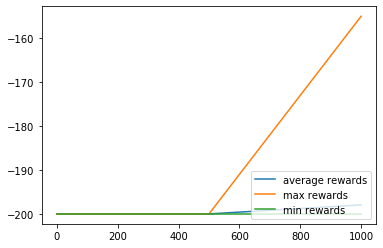

In [4]:
import gym
import numpy
import matplotlib.pyplot as plt
env = gym.make("MountainCar-v0")


DECAY_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 1500
SHOW_EVERY = 3000
STATS_EVERY = 500

DISCRETE_OS_SIZE = [20]*len(env.observation_space.high)  #離散成 20 等分
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

# Exploration settings
epsilon = 1  # not a constant, qoing to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)



## initialized q table
q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

# 統計數據
ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low) / discrete_os_win_size
    # 取整數
    return tuple(discrete_state.astype(np.int))



for episode in range(EPISODES):
    
    episode_reward = 0
 
    if episode % SHOW_EVERY == 0:
        print('完成第',episode,'次遊戲')
        render = True
    else:
        render = False
        
    discrete_state = get_discrete_state(env.reset())
    done = False
    
    while not done:
        
        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)
        
        new_state, reward, done, _ = env.step(action)
    
        episode_reward += reward    
        
        new_discrete_state = get_discrete_state(new_state)
        
         
        if render:
            env.render()    
            
        if not done:

            
            if np.random.random() > epsilon:
                # Get action from Q table
                new_action = np.argmax(q_table[new_discrete_state])
            else:
             # Get random action
                new_action = np.random.randint(0, env.action_space.n)

            #sarsa 更新需要用到的值
            
            future_q = q_table[new_discrete_state][new_action]
            current_q = q_table[discrete_state][action]
           
            
            # SARSA 更新公式
            new_q = (1-DECAY_RATE) * current_q + DECAY_RATE*(reward + DISCOUNT * future_q)

            q_table[discrete_state][action] = new_q
            
        elif new_state[0] >= env.goal_position:
            print('我們在第',episode,'次遊戲成功')
            q_table[discrete_state][action] = 0    
            
        discrete_state = new_discrete_state
        action = new_action
        
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
    
    
    ep_rewards.append(episode_reward)
    
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards[-STATS_EVERY:])/len(ep_rewards[-STATS_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')
        
        
        
env.close()


plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.show()